<a href="https://colab.research.google.com/github/Alvarofernandes84/Estudos-Python/blob/main/BlackFriday_Analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #Importa a biblioteca pandas, Criação de tabelas
import matplotlib.pyplot as plt #Importa a biblioteca matplotlib e uma de suas funções pyplot. Utilizada para criação de gráficos.
import numpy as np #NumPy é uma biblioteca essencial e altamente vantajosa para quem trabalha com cálculos numéricos e científicos em Python.


In [2]:
from pandas.io.parsers.readers import read_csv #Importação da importação feita do github.
pd = read_csv('BLACKFRIDAY.csv') #Lendo um arquivo csv e colocando numa variavel chamada (pd).
pd #Print.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
383975,1005077,P00150342,M,26-35,2,A,0,0.0,8.0,14.0,NaN,2230.0
383976,1005077,P00110542,M,26-35,2,A,0,0.0,8.0,NaN,NaN,9768.0
383977,1005077,P00111942,M,26-35,2,A,0,0.0,8.0,17.0,NaN,9903.0
383978,1005077,P00019142,M,26-35,2,A,0,0.0,11.0,15.0,NaN,3067.0


In [3]:
pd.columns.to_list() #Pega todas as colunas e transforma em lista.

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [4]:
newData = pd[['User_ID','Gender','Age','Marital_Status','Purchase']] #Seleciona colunas específicas e coloca na variável 'newData'.
newData #print.

,User_ID,Gender,Age,Marital_Status,Purchase
0,1000001,F,0-17,0.0,8370.0
1,1000001,F,0-17,0.0,15200.0
2,1000001,F,0-17,0.0,1422.0
3,1000001,F,0-17,0.0,1057.0
4,1000002,M,55+,0.0,7969.0
...,...,...,...,...,...
383975,1005077,M,26-35,0.0,2230.0
383976,1005077,M,26-35,0.0,9768.0
383977,1005077,M,26-35,0.0,9903.0
383978,1005077,M,26-35,0.0,3067.0


In [5]:
newData.isnull().sum() #Retorna os valores nulos.

User_ID           0
Gender            0
Age               0
Marital_Status    1
Purchase          1
dtype: int64

In [6]:
newData.isnull().sum().sum() #Soma todos os resultados.

2

In [7]:
razaoHxM = newData.Gender.value_counts() #Soma a incidência que aparece M e F.
razaoHxM #Print.

M    289707
F     94273
Name: Gender, dtype: int64

In [8]:
total = razaoHxM.sum() #Faz da soma da variavel 'razaoHxM' e adiciona o resultado em 'total'.


In [9]:
percentage = [] #Uma lista vazia.
for i in range(razaoHxM.shape[0]): #Estrutura de repetição no range de 'razaoHxM'. A função 'shape' é o tamanho. [0] primeiro indice.
    pct = (razaoHxM[i] / total) * 100 #Cálculo de porcetagem. E resultado alocado para nova variável criada chamada "pct".
    percentage.append(round(pct, 2)) #Arredondar a porcentagem individualmente, e colocar dentro da lista vazia
    print(i) #Print do contador

razaoHxM["Percentage"] = percentage #Novo valor de razaoHxM será a lista "percentage"
display(razaoHxM) #Outra forma de printar


0
1


M                     289707
F                      94273
Percentage    [75.45, 24.55]
Name: Gender, dtype: object

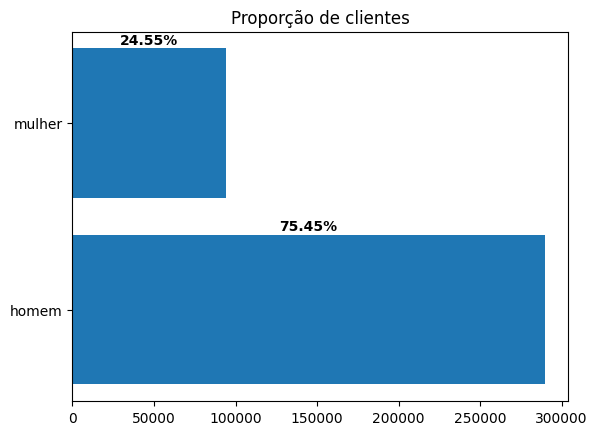

In [10]:
#Criação de gráficos
x = [razaoHxM[0], razaoHxM[1]] #Eixo horizontal
y = ['homem', 'mulher'] #Eixo vertical
graph1 = plt.barh(y, x) #biblioteca matplolib sendo utilizada. função barh() significa que o grafico vai ser de barra na horizontal. Alocando tudo isso na var 'graph1'.
plt.title('Proporção de clientes') #Titulo

i = 0 #valor da variável (i) declarada, para a repetição.
for p in graph1: #Isso inicia um loop for que percorre cada elemento 'p' em 'graph1'
    width = p.get_width() #Obtém a largura.
    height = p.get_height() #Obtém a altura.
    x, y = p.get_xy() #Obtém as coordenadas x e y da barra no gráfico.

    plt.text(  #Adiciona um texto (rótulo) à barra.
              x + width/2, #Centraliza o texto na largura.
              y + height*1.01, #Coloca o texto um pouco acima da altura da barra.
              str(razaoHxM.Percentage[i])+'%', #Isso obtém o valor da porcentagem associado ao índice i da estrutura de dados razaoHxM, e converte em uma string, acrescentando um símbolo de porcentagem.
              ha = 'center', #Define a alinhamento horizontal "ha" como "centro".
              va = 'bottom', #Alinhamento vertical "va" como "inferior".
              weight = 'bold') #Define o 'peso' do texto como "negrito".
    i += 1

In [11]:
relacaoIdade = newData[['Gender', 'Age']] #A variável "relacaoIdade" vai receber duas colunas de "newData", "genero" e "idade" e se tornar uma nova tabela.
relacaoIdade #printando

,Gender,Age
0,F,0-17
1,F,0-17
2,F,0-17
3,F,0-17
4,M,55+
...,...,...
383975,M,26-35
383976,M,26-35
383977,M,26-35
383978,M,26-35


In [12]:
relacao = relacaoIdade.value_counts() #Retorna a maior incidência de valores que a tabela possui, e alocando numa nova variável.
relacao #Printando.

Gender  Age  
M       26-35    117859
        36-45     58070
        18-25     52754
F       26-35     35094
M       46-50     22628
        51-55     19986
F       36-45     18823
        18-25     17279
M       55+       11423
F       46-50      9103
M       0-17       6987
F       51-55      6901
        55+        3578
        0-17       3495
dtype: int64

In [13]:
razaoIdade = relacaoIdade.Age.value_counts() #Retornando a maior incidência especificando a idade, e colocando numa nova variável.
razaoIdade #Printando

26-35    152953
36-45     76893
18-25     70033
46-50     31731
51-55     26887
55+       15001
0-17      10482
Name: Age, dtype: int64

In [14]:
relacao = relacao.sort_index() #Organizando a tabela usando o .sort_index()
relacao #Printando nova tabela organizada

Gender  Age  
F       0-17       3495
        18-25     17279
        26-35     35094
        36-45     18823
        46-50      9103
        51-55      6901
        55+        3578
M       0-17       6987
        18-25     52754
        26-35    117859
        36-45     58070
        46-50     22628
        51-55     19986
        55+       11423
dtype: int64

<ipython-input-15-f5586ecebe38>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk') #Configura o estilo de apresentação visual dos gráficos.


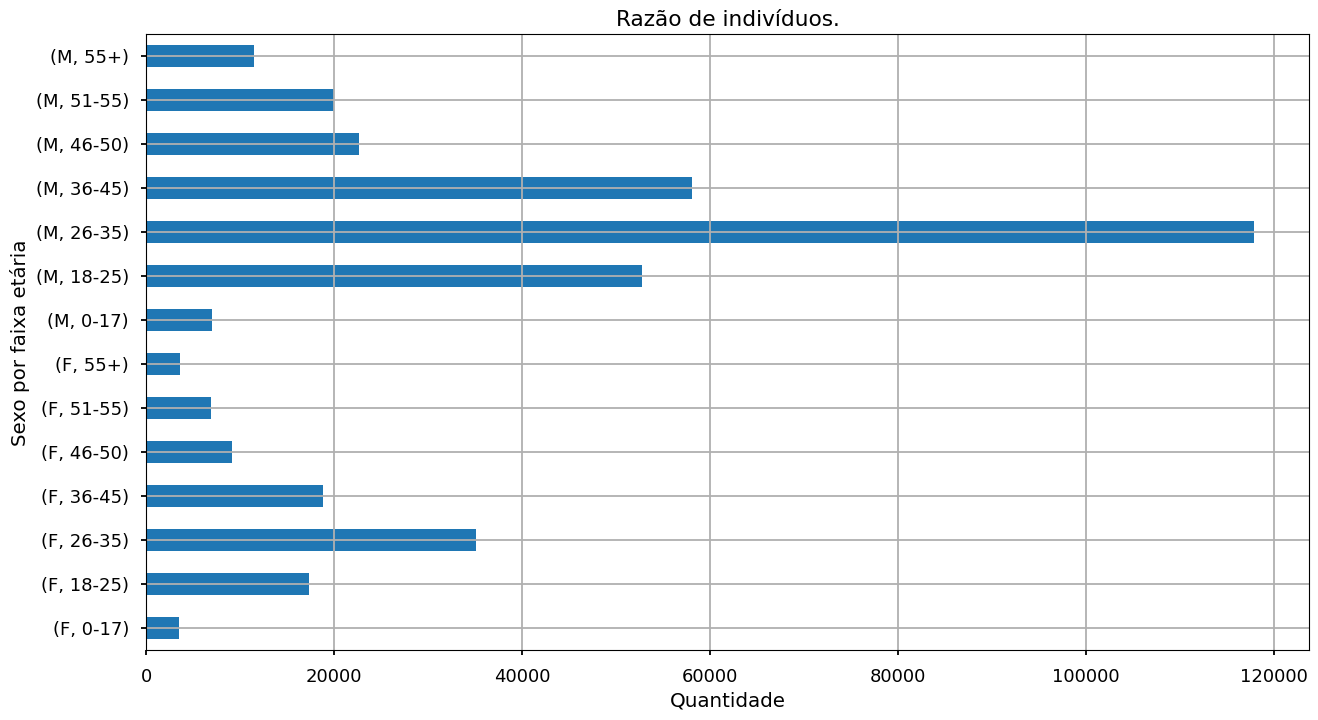

In [15]:
plt.style.use('seaborn-talk') #Configura o estilo de apresentação visual dos gráficos.
plt.rcParams['figure.figsize'] = [15,8] #Define o tamanho padrão da figura.
relacao.plot(kind = 'barh') #Onde se passa os dados a serem mostrados (relacao.plot), e como serão mostrados (kind = 'barh') ou seja, na horizontal.
plt.title("Razão de indivíduos.") #Titulo.
plt.xlabel('Quantidade') #Eixo X.
plt.ylabel('Sexo por faixa etária') #Eixo Y.
plt.grid(True) #Grades pela tabela.
plt.show() #Expor a gráfico.

In [16]:
relacaoH = relacao['M'] #Na tabela 'relacao' o que tiver 'M' vai ser alocado para 'relacaoH' (Apenas sexo masculino).
relacaoH #Printando.

Age
0-17       6987
18-25     52754
26-35    117859
36-45     58070
46-50     22628
51-55     19986
55+       11423
dtype: int64

In [17]:
relacaoF = relacao['F'] #Na tabela 'relacao' o que tiver 'F' vai ser alocado para 'relacaoF' (Apenas sexo feminino).
relacaoF #Printando.

Age
0-17      3495
18-25    17279
26-35    35094
36-45    18823
46-50     9103
51-55     6901
55+       3578
dtype: int64

In [18]:
#Outra forma de apresentar graficos.
listaH = [] #Nova lista.
listaM = [] #Nova lista.

# Hora de separar Homens e mulheres.
for i in relacaoH: #Uma estrutura de repetição para percorrer pela tabela 'relacaoH'.
    listaH.append(i) #Adicionando índice por índice na nova lista 'listaH'.
for i in relacaoF: #Uma estrutura de repetição para percorrer pela tabela 'relacaoF'.
    listaM.append(i) #Adicionando índice por índice na nova lista 'listaF'.

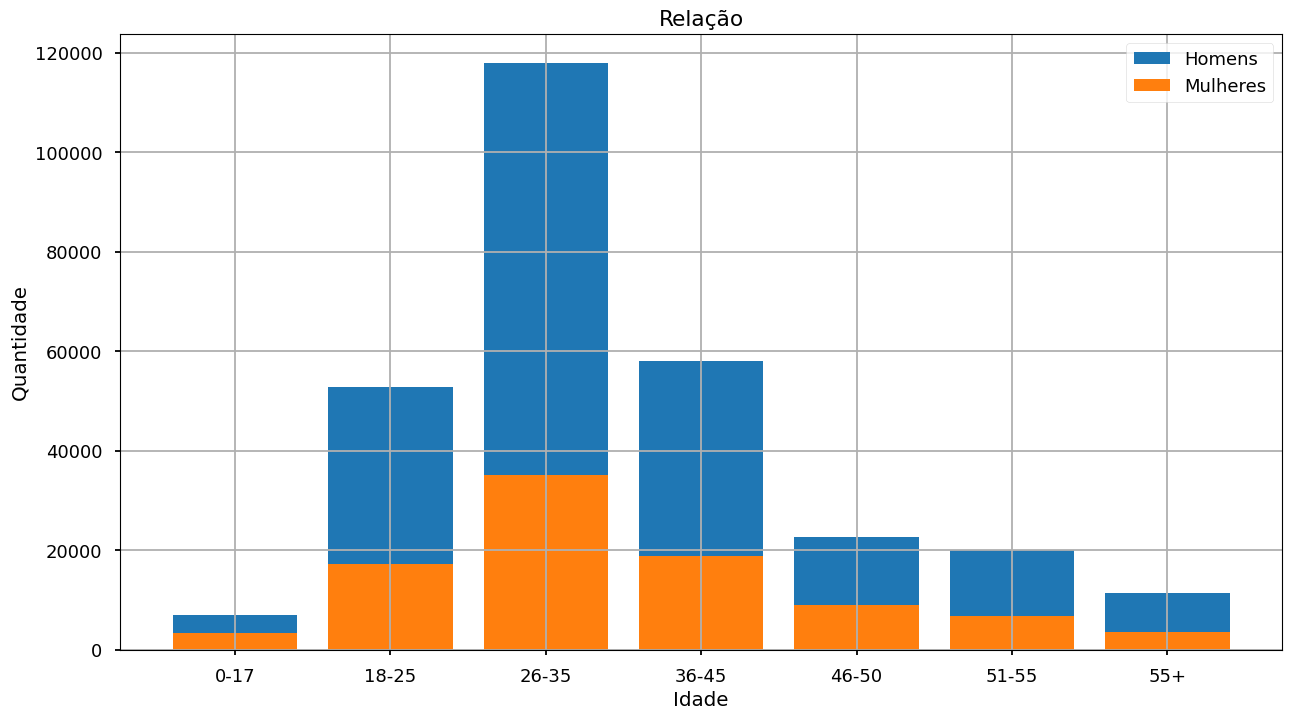

In [19]:
x1 = listaH #Definindo x1 como lista dos homens.
x2 = listaM #Definindo x2 como lista das mulheres.

#Isso determina em quais posições as barras serão colocadas nos gráficos.
y1 = relacao['M'].index # y1 vai ser definido como índices das entradas da coluna 'M'.
y2 = relacao['F'].index # y2 vai ser definido como índices das entradas da coluna 'F'.

plt.title('Relação') #Titulo principal.
plt.xlabel('Idade')  #Titulo do eixo X.
plt.ylabel('Quantidade') #Titulo do eixo Y.

plt.bar( y1, x1, label = 'Homens') #Criando as barras com rótulo(Homens).
plt.bar(y2, x2, label = 'Mulheres') #Criando as barras com rótulo(Mulheres).
plt.legend() #Legenda no canto superior.
plt.grid(True) #Grades.